# Plánování v umělé inteligenci

Plánování je jedním ze základních problémů v umělé inteligenci,
od hledání vhodného tahu v piškvorkách až po řízení autonomního auta.

Základním přístupem k plánování je prohledávání stavového prostoru, např. možných stavů rozehraných piškvorek, ve kterém se snažíme najít předepsané cílové stavy (třeba v piškvorkách to jsou ty stavy, ve kterých máme pět symbolů v řadě).

Znalost algoritmů prohledávání stavového prostoru přijdou vhod i pro jednodušší problémy, na které běžně narazíte v programátorských soutěžích (např. [InterLoS](https://interlos.fi.muni.cz/)), nebo pohovorech do IT firem.

---

Nejprve se podívejte, [jak pracovat s jupyter notebookem](./starter.ipynb). Buňky pak spouštějte v uvedeném pořadí, začntěte tou následující:

In [1]:
# Nastaveni a importy
%matplotlib inline
from search import parse_state, is_goal, actions, move
from search import show_plan, visualize_search, log_search_step
import solutions

# Hledání cesty ve vesmíru


**Problém:**
Hledáme plán pro raketku ve vesmíru,
podle kterého raketka doletí do cíle,
aniž by po cestě narazila do asteroidu.

**Stav:**
Prostředí tvoří mřížka, některá políčka jsou zablokovaná asteroidy. Raketka začíná někde na spodním řádku a musí doletět do horního řádku.

c1

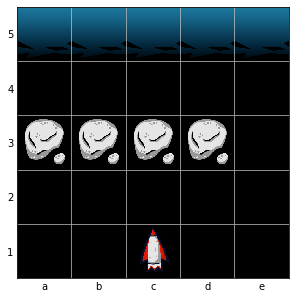

In [2]:
state = parse_state(
'| | | | | |'
'| | | | | |'
'|A|A|A|A| |'   # A = asteroid
'| | | | | |'
'| | |S| | |')  # S = spaceship
state

**Cílový stav** je takový stav, ve kterém se raketka nachází na horním řádku. Pro testování cílovosti stavu použijte funkci `is_goal(state)`.

In [3]:
# Ukazka stavu, ktery neni cilovy.
state = parse_state(
'| | | | | |'
'| | | | | |'
'|A|A|A|A| |'
'| | | | | |'
'| | |S| | |')
is_goal(state)

False

In [4]:
# Ukazka stavu, ktery je cilovy.
state_b = parse_state(
'| | | |S| |'
'| | | | | |'
'|A|A|A|A| |'
'| | | | | |'
'| | | | | |')
is_goal(state_b)

True

**Akce:**
Raketka letí stále vpřed a může přitom zatáčet doleva a doprava (dostoupné jsou tedy tři akce: 'l' jako 'left', 'f' jako 'forward', 'r' jako 'right'.

Funkce `actions` vrací seznam akcí dostupných v daném stavu:

In [5]:
actions(state)

['l', 'f', 'r']

Funkce `move(s, a)` vrací stav, který vznikne ze stavu *s* po provedení akce *a*:

d2

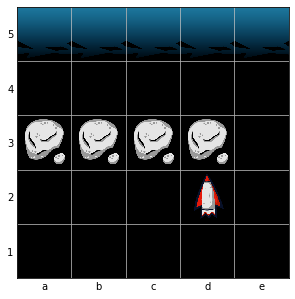

In [6]:
next_state = move(state, 'r')
next_state

Všimněte si, že raketka se při akci `r` posunula nejen o 1 pole doprava, ale současně i o 1 pole vpřed (tj. raketka letí stále vpřed).

V některých stavech nejsou dostupné všechny tři akce, ale jen některé:

In [7]:
actions(next_state)

['r']

**Plán:** Řešením problému je posloupnost akcí, které musí raketka vykonat, aby se dostala do cíle. Příklad plánu je řetězec `'ffl'` (rovně, rovně, doleva).


<div class="alert alert-block alert-success">
<b>Úkol 1: Dokončení plánu</b><br/>
Upravte plán (proměnná <i>plan</i>) tak, aby raketka doletěla do cíle. 
</div>

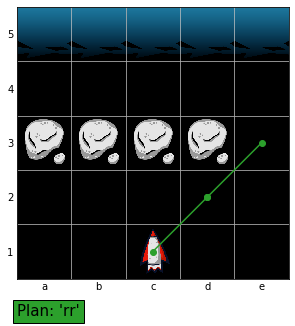

In [8]:
plan = 'rr'  # upravte tento plan
show_plan(state, plan, interactive=False)

<div class="alert alert-block alert-info">
<b>Shrnutí problému plánování</b><br/>
<hr>

<p>
Problém plánování se skládá ze 4 částí:
<ul>
<li>počáteční stav,</li>
<li>funkce <code>actions(s)</code> vracející akce dostupné ve stavu <i>s</i>,</li>
<li>funkce <code>move(s, a)</code> vracející nový stav, který vznikne z <i>s</i> provedením <i>a</i>,</li>
<li>funkce <code>is_goal(s)</code> vracející <i>True</i> právě tehdy, když je <i>s</i> cílový stav.</li>
</ul>
</p>

Řešením problému je plán, čili posloupnost akcí, která dovede raketku z počátečního stavu do cílového. Pro vizualizaci plánu můžete použít funkci 
<code>show_plan(initial_state, plan)</code>.
</div>

# Hladové hledání (Greedy Search)

Na rozehřátí začneme zjednodušením: budeme předpokládat, že je v každém kroku bezpečné použít libovolnou z dostupných akcí, tj. že na mapě nejsou žádné "slepé uličky". V takovém případě je tvorba plánu jednoduchá: vybíráme jakoukoliv dostupnou akci, dokud se nedostaneme do cíle.

<div class="alert alert-block alert-success">
<b>Úkol 2: Hladové hledání</b><br/>
Implementujte funkci *greedy_search(initial_state)*,
která vrací hladově vytvořený plán pro cestu z *initial_state*
do cílového stavu.
Pokud hladová tvorba plánu selže (v některém stavu už nebude dostupná žádná akce), vraťte částečný plán.

<p>
Budete potřebovat:
<ul>
<li>funkce <i>actions(s)</i>, <i>move(s, a)</i>, <i>is_goal(s)</i>,</li>
<li>
    výběr první dostupné akce: <code>available_actions[0]</code>,
</li>
<li>vytvoření prázdného plánu: <code>plan = ''</code>,</li>
<li>rozšíření plánu o jednu akci: <code>plan += action</code>.</li>
</ul>
</p>
</div>

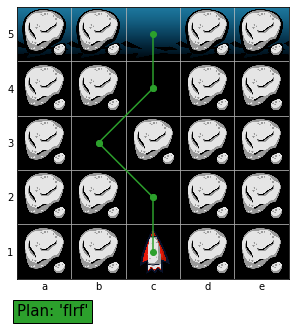

In [9]:
def greedy_search(initial_state):
    plan = ''
    # TODO: Implementovat hladove vyhledavani.    
    # Vracime uplny nebo castecny plan.
    return plan

state = parse_state(
'|A|A| |A|A|'
'|A|A| |A|A|'
'|A| |A|A|A|'
'|A|A| |A|A|'
'|A|A|S|A|A|')
plan = solutions.greedy_search(state)  # vzorove reseni
#plan = greedy_search(state)  # vase reseni
show_plan(state, plan, interactive=False)

Vyzkoušejte váš algoritmus i na jiných mapách. Hladové plánování bude například dobře fungovat například na mapách s řídce rozmístěnými překážkami.

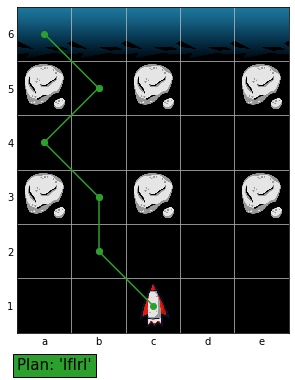

In [10]:
state = parse_state(
'| | | | | |'
'|A| |A| |A|'
'| | | | | |'
'|A| |A| |A|'
'| | | | | |'
'| | |S| | |')
plan = solutions.greedy_search(state)
show_plan(state, plan, interactive=False)

<div class="alert alert-block alert-success">
<b>Úkol 3: Hladové selhání</b><br/>
Hladové plánování je rychlé a jednoduché,
nefunguje však ve všech situacích.
Upravte plán v předchozí buňce tak,
aby hladový algoritmus cestu do cíle nenašel
(přestože cesta do cíle bude existovat).
</div>

<div class="alert alert-block alert-info">
<b>Shrnutí hladového plánování</b><br/>
<hr>

<ul>
<li>
Princip hladového hledání je volit v každém stavu první dostupnou akci.
</li>
<li>
Do hladového algoritmu lze snadno zakomponovat preferenci některých akcí (např. protože jsou některé akce levnější než jiné, nebo protože nás posunou blíže k cíli).
</li>
<li>
Hladové hledání je rychlé a jednoduché, nemusí však vždy najít řešení.
</li>
</ul>
</div>

# Prohledávání do hloubky (DFS)

Obecně tedy nestačí uvažovat pouze jednu z dostupných akcí. Je možné že se při prohledávání budeme muset "vrátit na rozcestí" a vykonat nějakou jinou akci. Takovýto "průchod s návratem" lze reprezentovat pomocí tzv. *prohledávacího stromu* (anglicky *search tree*), ve kterém vrcholy reprezentují možné stavy a orientované hrany reprezentují akce, které převádějí jeden stav do druhého.

Explored: Fringe:              Plans:                 
0: -      [c1]                 c1:''                  
1: c1     [d2, c2, b2]         + d2:r, c2:f, b2:l     
2: b2     [d2, c2, b3, a3]     + b3:lf, a3:ll         
3: a3     [d2, c2, b3, a4]     + a4:llf               
4: a4     [d2, c2, b3]                                
5: b3     [d2, c2]                                    
6: c2     [d2]                                        
7: d2     [e3]                 + e3:rr                
8: e3     [e4, d4]             + e4:rrf, d4:rrl       
9: d4     [e4, e5, d5, c5]     + e5:rrlr, d5:rrlf, c5:rrll
10: c5    [e4, e5, d5]                                


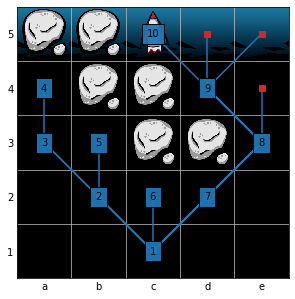

In [14]:
# Ukazka prohledavaciho stromu.
s = parse_state(
'|A|A| | | |'
'| |A|A| | |'
'| | |A|A| |'
'| | | | | |'
'| | |S| | |')

# Pro vizualizaci jednotlivych kroku nastavte interactive=True.
with visualize_search(s, text=True, interactive=False):
    solutions.dfs(s)

Stavy, které jsme již viděli (tj. jsou součástní prohledávácího stromu) se hodí rozdělit do dvou skupin podle toho, zda jsme už do stromu zařadili jejich následníky (říkáme, že jsme ho "expandovali").
Expandované stavy se často označují jako *prozkoumané* (*explored*), zatímco skupině viděných, ale neepxandovaných stavů se říká *okraj* (*fringe*). Na obrázku jsou prozkoumané stavy zobrazené modře, stavy na okraji jsou zobrazeny červeně.

Obecné schéma **stromového prohledávání** (*tree search*) je následovné:
1. Zařaď do okraje počáteční stav.
2. Odeber jeden stav z okraje. Pokud je cílový, skonči.
3. Jinak ho expanduj, tj. zařaď do okraje jeho následníky.
4. Opakuj kroky 2-3, dokuď nenajdeš cílový stav, nebo dokud se nevyprázdní okraj.
5. Pokud se vyprázdnil okraj, tak cesta do cíle neexistuje.

Existuje několik variant stromového prohledávání lišících se ve strategii výběru stavu z okraje k prozkoumání (krok 2).
Vybírat vrchol z okraje lze i náhodně, chytřejším výběrem však můžeme dosáhnout lepších vlastností algoritmu.
Základní variantou s dobrou paměťovou složitostí je **prohledávání do hloubky** (anglicky *depth-first search*, DFS),
při kterém vybíráme z okraje ten stav, který jsme tam zařadili jako poslední. Kroky prohledávání do hloubky můžete vidět i na výše uvedeném příkladu prohledávacího stromu.

Takového chování dosáhneme, když jako datovou strukturu pro okraj použijeme *zásobník* (anglicky *stack*), což je prostě seznam, do kterého přidáváme a odebíráme prvky na stejném konci, stejně jako u štosu knih nebo
talířů naskládaných do sebe.

In [15]:
stack = ['a', 'b', 'c']  # vrchol zasobniku je vpravo ('c')
stack.append('d')  # pridani 'd' na vrchol zasobniku
print(stack)  # ['a', 'b', 'c', 'd']
stack.pop()  # odebrani prvku 'd' z vrcholu zasobniku
print(stack)  # ['a', 'b', 'c']
stack.pop()  # odebrani prvku 'c' z vrcholu zasobniku
print(stack)  # ['a', 'b']

['a', 'b', 'c', 'd']
['a', 'b', 'c']
['a', 'b']


<div class="alert alert-block alert-success">
<b>Úkol 4: Prohledávání do hloubky</b><br/>
Implementujte funkci <i>dfs(initial_state)</i>,
která vrací plán pro cestu z <i>initial_state</i> do cílového stavu
nalezený pomocí prohledávání do hloubky.

<p>
Tipy:
<ul>
<li>Použijte zásobník pro ukládání stavů na okraji.</li>
<li>Pro každý viděný stav si uložte jeho plán do slovníku.<br>
    Vytvoření a uložení nového plánu provedete takto:<br>
    `plans[next_state] = plans[state] + action`.<br>
    Když pak najdete cílový stav, stačí vrátit `plans[state]`.
    </li>
<li>Akce můžete procházet v převráceném pořadí pomocí `reversed(actions(s))`.</li>
<li>Abyste zabránily opakovanému prozkoumávání stejných stavů,
    do kterých se lze dostat více cestami,
    přidávejte do zásobníku pouze ještě neviděné stavy.
    Pro všechny již viděné stavy máme nějaký plán,
    takže kontrola může vypadat takto:
    `if next_state not in plans: ...`.</li>
</ul>
</p>
</div>

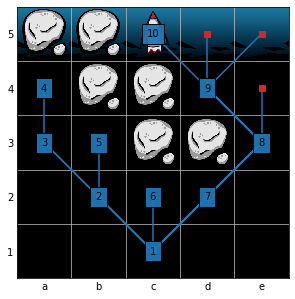

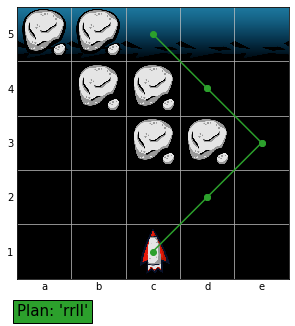

In [16]:
def dfs(initial_state):
    stack = [initial_state]
    plans = {initial_state: ''}
    log_search_step(None, stack, plans)
    while stack:
        state = stack.pop()
        # TODO: Implementujte DFS:
        # - Zkontrolujte, zda je stav cilovy (pokud ano, vratte plan).
        # - Pridejte na zasobnik vsechny jeho nasledniky,
        #   ktere jsme jeste nevideli.
        # - Ulozte take plany do vsech novych stavu.
        log_search_step(state, stack, plans)  # vizualizace
            
state = parse_state(
'|A|A| | | |'
'| |A|A| | |'
'| | |A|A| |'
'| | | | | |'
'| | |S| | |')
with visualize_search(state, interactive=False):
    # Pro vzorove reseni:
    plan = solutions.dfs(state)
    # Vase reseni (preruseni pri zacykleni: Kernel > Iterrupt)
    #plan = dfs(state)
show_plan(state, plan)

### Nevýhoda DFS

V našem vesmírném světě se můžou vyskoutnout i červí díry.
Pokud vletíte do jednoho konce červí díry, objevíte se vzápětí na jejím druhém konci.
Díky červím dírám můžou mít cesty do cíle výrazně různou délku
a my bychom chtěli najít co nejkratší.
Nalezení nejkratšího řešení ale DFS negarantuje.
V nejhorším případě může prozkoumat všechny možné stavy, než najde
cíl, a to i v případě, že cíl se nachází kousíček od počátečního stavu.

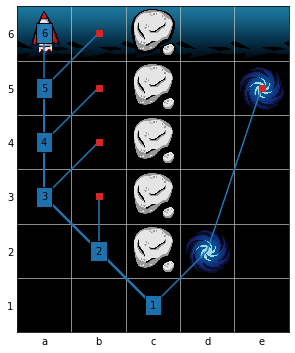

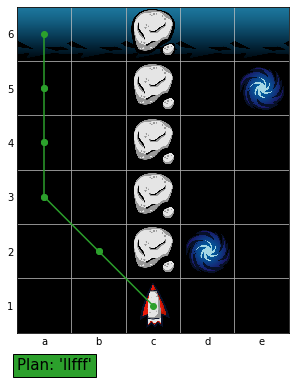

In [17]:
state = parse_state(
'| | |A| | |'
'| | |A| |W|'
'| | |A| | |'
'| | |A| | |'
'| | |A|W| |'
'| | |S| | |')
with visualize_search(state, interactive=False):
     plan = solutions.dfs(state)
show_plan(state, plan)

<div class="alert alert-block alert-info">
<b>Shrnutí DFS</b><br/>
<hr>

<ul>
<li>
Při stromovém prohledávání si udržujeme množinu vrcholů,
které chceme v budoucnu prozkoumat (okraj). V každém kroku jeden
vrchol vybereme a do okraje zařadíme jeho následníky.
</li>
<li>
DFS je varianta stromového prohledávání, při kterém z okraje
vybíráme vrcholy v pořadí LIFO (Last In - First Out), tj.
jako okraj používáme zásobník.
</li>
<li>
DFS má při správné implementaci dobrou paměťovou složitost (lineární vzhledem k hloubcce stromu). Časová složitost je horší - v nejhorším případě musí prozkoumat všechny možné stavy.
</li>
<li>
Pokud můžou mít řešení různé délky, DFS nemusí najít to nejkratší.
</li>
<li>
DFS lze velmi přirozeně implementovat i rekurzivně
(viz bonusová sekce dole).
Základní iterativní verze (kterou jsme implementovali my)
je také jednoduchá, nicméně v obecném případě nemusí pořadí
průzkumu odpovídat přesně DFS, což může v některých aplikacích
vadit. (Iterativní verze DFS, která prohledává vrcholy ve správném
pořadí a přitom si zachovává lineární paměťovou složitost,
je o kousek složitější.)
</li>
</ul>
</div>

# Prohledávání do šířky (BFS)

Variantou stromového prohledávní, které najde nejkraší cestu,
je *prohledávání do šířky* (*Breadth-first search*, BFS)
Při BFS využíváme jako okraj frontu, tedy kolekci typu *First-In First-Out* (FIFO), což je prostě seznam, v němž odebíráme z opačné strany, než na kterou přidáváme. Jako u běžné fronty v obchodě.

In [18]:
from collections import deque
queue = deque(['a', 'b', 'c'])  # 'a' na zacatku fronty, 'c' na konci
queue.append('d')  # 'd' prisel na konec fronty
print(queue)  # deque(['a', 'b', 'c', 'd'])
queue.popleft()  # odchazi 'a'
print(queue)  # deque(['b', 'c', 'd'])
queue.popleft()  # odchazi 'b'
print(queue)  # deque(['c', 'd'])

deque(['a', 'b', 'c', 'd'])
deque(['b', 'c', 'd'])
deque(['c', 'd'])


Při použití fronty jako okraje dojde k průzkumu prvků v pořadí po vrstvách podle jejich vzdálenosti od počátečního stavu:

Explored: Fringe:              Plans:                 
0: -      [c1]                 c1:''                  
1: c1     [b2, c2, d2]         + b2:l, c2:f, d2:r     
2: b2     [c2, d2, a3, b3]     + a3:ll, b3:lf         
3: c2     [d2, a3, b3]                                
4: d2     [a3, b3, e3]         + e3:rr                
5: a3     [b3, e3, a4]         + a4:llf               
6: b3     [e3, a4]                                    
7: e3     [a4, d4, e4]         + d4:rrl, e4:rrf       
8: a4     [d4, e4]                                    
9: d4     [e4, c5]             + c5:rrll              


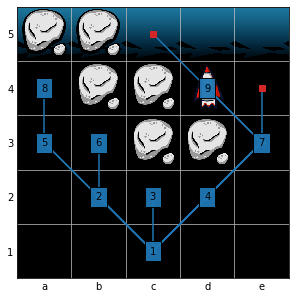

In [19]:
state = parse_state(
'| | |A| | |'
'| | |A| |W|'
'| | |A| | |'
'| | |A|W| |'
'| | |A| | |'
'| | |S| | |')
# Pro vizualizaci jednotlivych kroku nastavte interactive=True.
with visualize_search(state, text=True, interactive=False):
    solutions.bfs(s)

<div class="alert alert-block alert-success">
<b>Úkol 5: Prohledávání do šířky</b><br/>
Implementujte funkci <i>bfs(initial_state)</i>,
která vrací nejkratší plán pro cestu z <i>initial_state</i> do cílového stavu
nalezený pomocí prohledávání do šířky.

<p>
Tipy:
<ul>
<li>Použijte frontu pro ukládání stavů na okraji.</li>
<li>
Pro každý viděný stav si uložte jeho plán do slovníku (jako u DFS).
</li>
<li>
Abyste zabránily opakovanému prozkoumávání stejných stavů,
do kterých se lze dostat více cestami,
přidávejte do fronty pouze ještě neviděné stavy.
Pro všechny již viděné stavy máme nějaký plán,
takže kontrola může vypadat takto:
`if next_state not in plans: ...`.
</li>
<li>
Už při vkládání do fronty můžete kontrolovat, zda není stav cílový.
</li>
</ul>
</p>
</div>

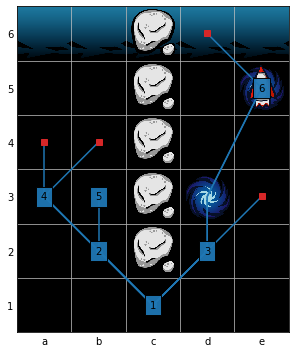

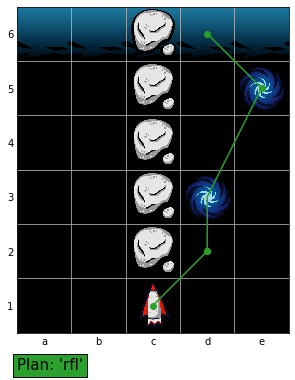

In [20]:
def bfs(initial_state):
    if is_goal(initial_state):
        return ''
    queue = deque([initial_state])
    plans = {initial_state: ''}
    log_search_step(None, queue, plans)
    while queue:
        state = queue.popleft()
        # TODO: Implementujte BFS.
        log_search_step(state, queue, plans)

state = parse_state(
'| | |A| | |'
'| | |A| |W|'
'| | |A| | |'
'| | |A|W| |'
'| | |A| | |'
'| | |S| | |')
with visualize_search(state, interactive=False):
    # Vzorove reseni:
    plan = solutions.bfs(state)
    # Vase reseni:
    #plan = bfs(state)
show_plan(state, plan)

<div class="alert alert-block alert-info">
<b>Shrnutí BFS</b><br/>
<hr>

<ul>
<li>
BFS je varianta stromového prohledávání, při kterém stavy z okraje
vybíráme v pořadí FIFO (First In - First Out), tj.
jako okraj používáme frontu.
</li>
<li>
BFS prochází stavy v pořadí podle jejich vzdálenosti od počátečního stavu. Díky tomu najde zaručeně nejkratší řešení.
</li>
<li>
BFS má větší paměťové nároky než DFS.
(V nejhorším případě, když jsou všechny cílové stavy v maximální hloubce, se do frotny postupně zařadí všechny necílové stavy.)
</li>
</ul>
</div>

# Prohledávání s cenou (UCS, Dijkstra)

BFS najde nejkratší plán co do počtu akcí.
Pokud ale přidáme ceny akcí a chceme najít plán s nejnižší cenou
(součtem cen provedených akcí), pak je potřeba algoritmus ještě trochu
vylepšit. Místo klasické fronty použijeme frontu *prioritní*, v níž jsou stavy uspořádané podle ceny nejlevnější nalezené cesty do nich.
Tomuto algoritmu říkáme *prohledávání s cenou* (*Uniform Cost Search*, UCS) a v případě, kdy hledáme nejkratší cestu do všech vrcholů zadaného grafu je známý též jako *Dijkstrův algoritmus*.

In [21]:
# Priklad cen - letet rovne je levnejsi nez letet do boku:
ACTION_COSTS = {'l': 3, 'f': 2, 'r': 3}

Pokud si budeme ke každému viděnému vrcholu pamatovat cenu nejlevnější cesty do něj, tak lze prioritní frontu jednoduše implementovat jako množinu prvků, ze které odebíráme vždy ten, který má nejlevnější uvedenou cenu:

In [22]:
# Ukladame cenu do vsech videnych stavu (vcetne jiz prozkoumanych).
costs = {'a':0, 'b':3, 'c':3, 'd':5, 'e':6}
fringe = {'c', 'd', 'e'}  # Pouze nektere z nich jsou jeste na okraji.
state = min(fringe, key=lambda s: costs[s])  # Vyber ten nejlevnejsi.
fringe.remove(state)  # Odeber ho z mnoziny.
print('Odebrany stav:', state)
print('Okraj:', fringe)

Odebrany stav: c
Okraj: {'d', 'e'}


In [23]:
# Zarazeni noveho prvku do prioritni fronty:
costs['f'] = 4
fringe.add('f')
print('Okraj:', fringe)

Okraj: {'f', 'd', 'e'}


Podívejme se, jak by v případě uvedených cen vypadal průběh prohledávání:

Explored: Fringe:              Plans:                  Costs:              
0: -      [c1]                 c1:''                   c1:0                
1: c1     [b2, d2]             + b2:l, d2:r            + b2:3, d2:3        
2: b2     [a3, d2]             + a3:ll                 + a3:6              
3: d2     [a3, d3]             + d3:rf                 + d3:5              
4: d3     [a3, d4, e4]         + d4:rff, e4:rfr        + d4:7, e4:8        
5: a3     [d4, b4, e4]         + b4:llr                + b4:9              
6: d4     [d5, b4, e4, e5]     + d5:rfff, e5:rffr      + d5:9, e5:10       
7: e4     [d5, b4, e5]                                                     
8: d5     [b4, e5]                                                         


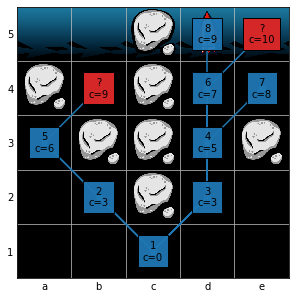

In [27]:
# Ukazka UCS prohledavaciho stromu.
state = parse_state(
'| | |A| | |'
'|A| |A| | |'
'| |A|A| |A|'
'| | |A| | |'
'| | |S| | |')
# Pro vizualizaci jednotlivych kroku nastavte interactive=True.
with visualize_search(state, costs=True, text=True, interactive=False):
    solutions.ucs(state)
#     log_search_step(c1,     {b2, d2}, {c1:0, b2:3, d2:3})
#     log_search_step(b2,     {d2, a3}, {c1:0, b2:3, d2:3, a3:6})
#     log_search_step(d2,     {d3, a3}, {c1:0, b2:3, d2:3, d3:5, a3:6})

<div class="alert alert-block alert-success">
<b>Úkol 6: Prohledávání s cenou (UCS, Dijkstra)</b><br/>
Implementujte funkci <i>ucs(initial_state)</i>,
která vrací nejkratší plán pro cestu z <i>initial_state</i> do cílového stavu nalezený pomocí prohledávání s cenou.

<p>
Tipy:
<ul>
<li>
Kromě nejlevnějších plánů do všech viděných stavů ukládejte i
jejich ceny.
</li>
<li>
Z množiny stavů na okraji vybírejte ten s nejnižší cenou plánu.
</li>
<li>
Při expanzi stavu je potřeba zjistit, jaká je cena plánu
do následného stavu při cestě přes prozkoumávaný stav:<br>
`new_cost = costs[state] + ACTION_COSTS[action]`.
</li>
<li>
Pokud se ale do viděného vrcholu umíme dostat i jinou cestou,
musíme zjistit, zda je nová cesta levnější.
Trik pro získání původní ceny nebo nekonečna, pokud jsme
ještě žádnou cestu do stavu neviděli:<br>
`old_cost = costs.get(next_state, inf)`.
</li>
<li>
Nový plán a jeho cenu uložíme pouze v případě,
že je levnější než cena původního plánu.
(A nezapomeneme přidat stav do okraje.)
</li>
<li>
Cílovost stavu je možné kontrolovat až při jeho průzkumu
(nikoliv už při zařazovaní do okraje), jinak bychom
nemuseli vrátit nejlevnější plán.
</li>
</ul>
</p>
</div>

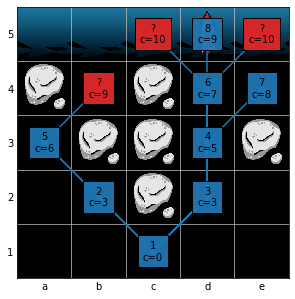

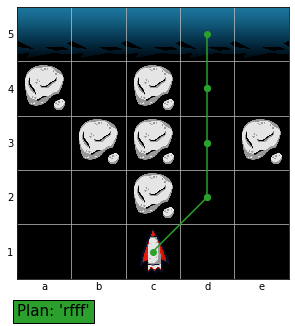

In [29]:
from math import inf

def ucs(initial_state):
    fringe = {initial_state}
    costs = {initial_state: 0}
    plans = {initial_state: ''}
    log_search_step(None, fringe, plans, costs)
    while fringe:
        # Vybirame stav z okraje s nejnizsi cenou:
        state = min(fringe, key=lambda s: costs[s])
        fringe.remove(state)
        # TODO: Implementovat krok UCS.
        log_search_step(state, fringe, plans, costs)

state = parse_state(
'| | | | | |'
'|A| |A| | |'
'| |A|A| |A|'
'| | |A| | |'
'| | |S| | |')
with visualize_search(state, costs=True, interactive=False):
    # Vzorove reseni:
    plan = solutions.ucs(state)
    # Vase reseni:
    #plan = ucs(state)
show_plan(state, plan)

<div class="alert alert-block alert-info">
<b>Shrnutí UCS (Dijkstra)</b><br/>
<hr>
<ul>
<li>
UCS (Dijkstra) je varianta stromového prohledávání, při kterém z okraje vybíráme stav s nejlevnější cenou, tj. jako okraj používáme prioritní frontu.
</li>
<li>
UCS prochází stavy v pořadí podle cen nejlevnějších cest do nich.
Díky tomu najde zaručeně nejlevnější řešení.
</li>
<li>
Prostorová i časová složitost závisí na nejlevnější cestě do některého cílového stavu (pokud aspoň do jednoho cíle vede krátká cesta, tak je to dobré).
</li>
<li>
Časovou složitost lze vylepšit chytřejší implementací prioritní fronty pomocí tzv. <i>haldy</i>.
</li>
</ul>
</div>

# A* – využití heuristik

Všechny uvedené algoritmy zatím nevyužívali informace, jak moc jsou zkoumané stavy blízko cíli. Takovou informaci typicky neznáme přesně,
ale dokážeme ji přibližně odhadnout. Takovému optimistickému odhadu zbývající ceny (vzdálenosti do cíle) říkáme *heuristika* a hledání pak označujeme za *informované*.

Nechť na světě nejsou červí díry (zjednoduší nám to vymyšlení vhodné heuristiky). 
Příkladem dolního odhadu na cenu do cíle pak může být vertikální vzdálenost od cíle vynásobená cenou cesty vpřed.
Pokud se na mapě nacházejí slepé uličky, nebude tento odhad vždy přesný, nicméně poskytuje dolní mez skutečné zbývající ceny.

In [30]:
def heuristic_distance(state):
    # Cilovy radek ma hodnotu 0, radek pod nim 1, atd.
    vertical_distance = state.spaceship.row
    # Jaka by byla cena, kdyby raketka mohla letet porad rovne.
    return vertical_distance * ACTION_COSTS['f']

state = parse_state(
'| | | | | |'
'|A| |A| | |'
'| |A|A| |A|'
'| |S|A| | |'
'| | | | | |')
heuristic_distance(state)

6

Pokud máme heuristiku, můžeme ji přímočaře zakomponovat jak do hladového hledání (v každém kroku poletíme do stavu s nejnižším heuristickým odhadem vzdálenosti do cíle), tak do prohledávání s cenou (UCS).

Algoritmus, který vzniky přidáním heuristiky do UCS se nazývá A* a jde o velmi jednoduché rozšíření: místo toho, abychom vybírali z okraje stavy s nejnižší cenou dosavadního plánu, budeme vybírat stav minimalizující součet ceny dosavadního plánu a heuristického odhadu ceny za zbytek cesty (součet udává dolní odhad celkové ceny cesty ze startu do cíle).

TODO: ilustracni obrazek

Podívejme se, jak by vypadal prohledávací strom pro A\*. Pro každý stav v prohledávacím stromě nyní uvádíme *g+h=f*, kde *g* je cena plánu do tohoto stavu, *h* je hodnota heuristiky pro zbytek cesty a *f* je jejich součet. Všimněte si, které stavy nebylo nutné prozkoumat oproti neinformovanému UCS.

Explored: Fringe:              Plans:                  Costs:               Heuristic:
0: -      [c1]                 c1:''                   c1:0                 c1:8 
1: c1     [b2, d2]             + b2:l, d2:r            + b2:3, d2:3         + b2:6, d2:6
2: b2     [a3, d2]             + a3:ll                 + a3:6               + a3:4
3: d2     [a3, d3]             + d3:rf                 + d3:5               + d3:4
4: d3     [a3, d4, e4]         + d4:rff, e4:rfr        + d4:7, e4:8         + d4:2, e4:2
5: d4     [a3, d5, e4, e5]     + d5:rfff, e5:rffr      + d5:9, e5:10        + d5:0, e5:0
6: d5     [a3, e4, e5]                                                           


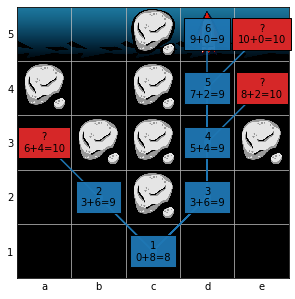

In [31]:
# Ukazka prohledavaciho stromu A*.
state = parse_state(
'| | |A| | |'
'|A| |A| | |'
'| |A|A| |A|'
'| | |A| | |'
'| | |S| | |')
with visualize_search(state, costs=True, heuristic=True, text=True, interactive=False):
    solutions.a_star(state)

<div class="alert alert-block alert-success">
<b>Úkol 7: A*</b><br/>
Implementujte funkci <i>a_star(initial_state)</i>,
která vrací nejkratší plán pro cestu z <i>initial_state</i> do cílového stavu nalezený pomocí cen a heuristik.

<p>
Tipy:
<ul>
<li>
Vyjděte z vašeho řešení UCS - stačí 2 malé změny a je hotovo.
</li>
<li>
První změnou je ukládání vypočtených heuristických hodnot:<br>
`heuristic[next_state] = heuristic_distance(next_state)`.<br>
Tento výpočet stačí provést jednou při prvním vidění stavu.
</li>
<li>
Druhou změnou je výpočet priority, která je nyní součtem dosavadní ceny a heuristického odhadu ceny zbytku plánu, tj. `costs[s] + heuristic[s]`.
</li>
</ul>
</p>
</div>

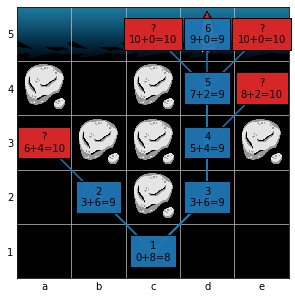

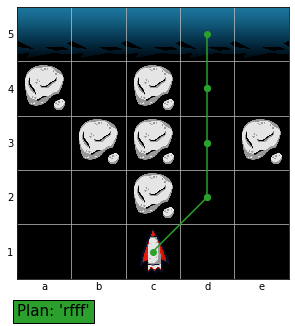

In [32]:
def a_star(initial_state):
    fringe = {initial_state}
    costs = {initial_state: 0}
    heuristic = {initial_state: heuristic_distance(initial_state)}
    plans = {initial_state: ''}
    log_search_step(None, fringe, plans, costs, heuristic)
    while fringe:
        # TODO: Implementujte krok A*.
        log_search_step(state, fringe, plans, costs, heuristic)


state = parse_state(
'| | | | | |'
'|A| |A| | |'
'| |A|A| |A|'
'| | |A| | |'
'| | |S| | |')
with visualize_search(state, costs=True, heuristic=True, interactive=False):
    # Vzorove reseni:
    plan = solutions.a_star(state)
    # Vase reseni:
    #plan = a_star(state)
show_plan(state, plan)

<div class="alert alert-block alert-info">
<b>Shrnutí A*</b><br/>
<hr>
<ul>
<li>
A-star je rozšíření UCS, ve kterém z okraje vybíráme stav s nejnižším součtem cena dosavadního plánu + odhad ceny za zbývající cestu do cíle. </li>
<li>
Aby bylo zaručeno nalezení nejkratší cesty, musí být heuristika optimistickým (spondím) odhadem na skutečnou cenu.
Na druhou stranu, čím těsnější (přesnější) odhad bude, tím efektivnější
prohledávání.
</li>
<li>
Heuristiky závisí na řešeném problému.
Základním přístupem k vymýšlení heuristik je "relaxace problému",
což znamená vypuštění nějakých podmínek ze zadání problému tak,
aby bylo problém triviální vyřešit (aby šlo heuristiku rychle spočítat).
Naše heuristika vznikla tak, že jsme odstranili podmínku,
že nelze letět přes asteroidy.
</li>
</ul>
</div>

# Bonusové úkoly

1. Implementujte rekurzivní varinatu DFS.
2. Vylepšete hladové hledání o heuristiku vzdálenosti do cíle.
  (Vyžaduje červí díry, aby mohla heuristika pomoct.)
3. Co by se v algoritmech změnilo, kdyby se na mapě vyskytovaly navíc diamanty, které by raketka musela při cestě do cíle posbírat?
4. Který algoritmus byste použili pro problém přelévání vody? V problémech přelévání vody máme k dispozici několik džbánů, které jsou zčásti naplněné (např. 1 je plný a ostatní prázdné) a hledáme nejmenší počet přelití vody z jednoho džbánu do druhého, abychom dostali požadované naplněnosti džbánů. Napište funkci pro řešení tohoto problému, která na vstup dostane velikosti džbánů, počáteční naplněnosti a cílovou naplněnost a vrátí posloupnost kroků (dvojic ze kterého do kterého džbánu přeléváme).

<div class="alert alert-block alert-info">
<h1>Shrnutí</h1>
<ul>
<li>
Existuje několik základních přístupů pro hledání plánu.
Každý z nich má své výhody a nevýhody a z toho plynoucí vhodnost použití v různých situacích.
</li>
<li>
Nejrychlejším přístupem je <i>hladové prohledávání</i>, to však nemusí najít žádné řešení, i když existuje.
</li>
<li>
Nejjednodušším typem stromového prohledávání, které na konečných grafech najde řešení vždy, je <i>prohledávání do hloubky</i> (DFS).
</li>
<li>
Pokud potřebujeme najít nejkratší plán, použijme <i>prohledávání do šířky</i> (BFS).
</li>
<li>
Pokud potřebujeme najít nejlevnější plán (akce mají různou cenu), použijme <i>prohledávání s cenou</i> (UCS, Dijkstra).
</li>
<li>
Prohledávání lze urychlit použitím heuristik,
ty jsou však závislé na konkrétním problému.
Známým algoritmem, který kombinuje prohledávání s cenou a heuristiky, je <i>A-star</i>.
</li>
</ul>
</div>


# Kam dál?

* Video: [CS 188 Artificial Intelligence](https://www.youtube.com/channel/UCB4_W1V-KfwpTLxH9jG1_iA/videos) (25 skvělých přednášek z UC Berkeley na YT).
* Kniha: [Artificial Intelligence: A Modern Approach](http://aima.cs.berkeley.edu/).
* Online kurz: [Udacity: Intro to Artificial Intelligence](https://classroom.udacity.com/courses/cs271).
* Prakticky: piškvorky a jiné hry (<a href="https://cs.wikipedia.org/wiki/Minimax_(algoritmus)">algoritmus Minimax</a>), SOČ.
* Na FI: předmět [PB016 Umělá inteligence](https://is.muni.cz/predmet/fi/podzim2017/PB016), obor [Umělá inteligence a zpracování přirozeného jazyka](https://obory.fi.muni.cz/bc/umela-inteligence-nlp), laboratoř [Adaptabilního učení](https://www.fi.muni.cz/adaptivelearning/).